In [50]:
import pandas as pd
import numpy as np

In [51]:
credit_data = pd.read_csv('train.csv')
credit_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [52]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [53]:
credit_data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [54]:
credit_data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<AxesSubplot:xlabel='Credit_Score', ylabel='Annual_Income'>

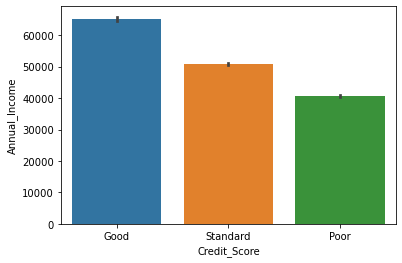

In [55]:
import seaborn as sns
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Annual_Income'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

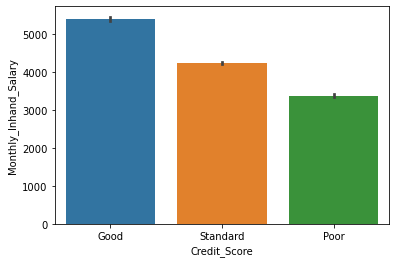

In [56]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Monthly_Inhand_Salary'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Age'>

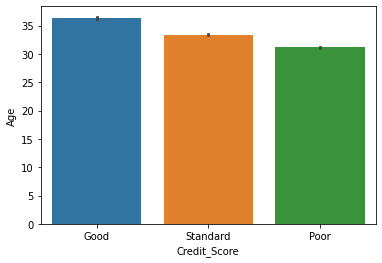

In [57]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Age'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

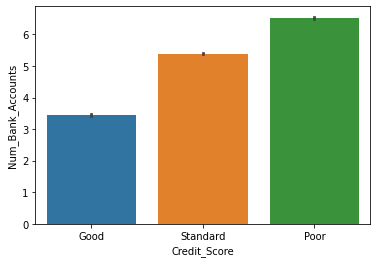

In [58]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Num_Bank_Accounts'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Outstanding_Debt'>

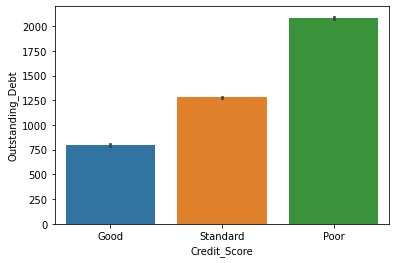

In [59]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Outstanding_Debt'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Interest_Rate'>

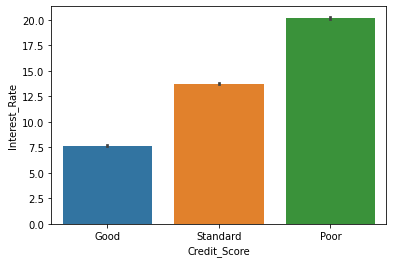

In [60]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Interest_Rate'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_of_Loan'>

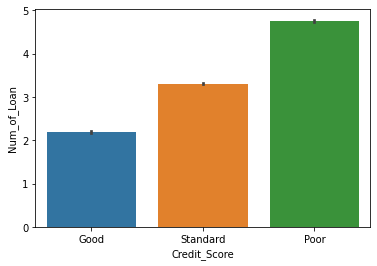

In [61]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Num_of_Loan'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Delay_from_due_date'>

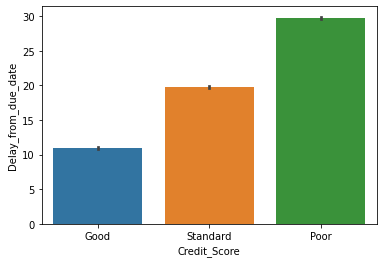

In [62]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Delay_from_due_date'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

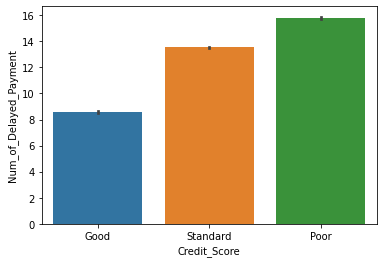

In [63]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Num_of_Delayed_Payment'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

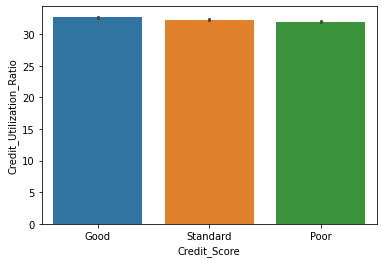

In [64]:
sns.barplot(x=credit_data['Credit_Score'], y=credit_data['Credit_Utilization_Ratio'])

In [65]:
credit_data["Credit_Mix"] = credit_data["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Bad": 0})

In [68]:
from sklearn.model_selection import train_test_split
X = credit_data.drop(['Credit_Score', 'Name', 'Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount', 'Payment_Behaviour'], axis=1)
y = credit_data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Train accuracy...", train_accuracy)
print("Test accuracy...", test_accuracy)

Train accuracy... 0.9999714285714286
Test accuracy... 0.8359
